## Creating our Dataset

In [3]:
import pandas as pd
import numpy as np

In [87]:
df = pd.DataFrame()

size = 100000

df['age'] = np.random.randint(0, 100, size)
df['time_on_socialmedia_per_day(hours)'] = np.random.uniform(0, 5, size)
df['number_of_workouts_per_week'] = np.random.randint(0, 10, size)
df['food_routine'] = np.random.choice(['healthy', 'balanced', 'moderate', 'irregular', 'unhealthy'], size)
df['avg_time_sleeping'] = np.random.uniform(0, 10, size)

### Level 1 - Using Loops and Locs

In [74]:
def check_age(age):
    if age > 40:
        return True
    else:
        return False

In [75]:
def recommend_doctor(column, value):
    if (
        (column == 'time_on_socialmedia_per_day(hours)') and (value >= 4) or
        (column == 'number_of_workouts_per_week') and (value <= 1) or
        (column == 'food_routine') and ((value == 'irregular') or (value == 'unhealthy')) or
        (column == 'avg_time_sleeping') and (value <= 4)
    ):
        return True
    else:
        return False

In [90]:
%%timeit

df['Need Doctor? (1)'] = None
for column in ['time_on_socialmedia_per_day(hours)', 'number_of_workouts_per_week', 'food_routine', 'avg_time_sleeping']:    
    for index in range(len(df)):
        age = df.loc[index, 'age']

        if (check_age(age) == True) and (recommend_doctor(column, df.loc[index, column]) == True):
            df.loc[index, 'Need Doctor? (1)'] = True
        
        else:

         if (df.loc[index, 'Need Doctor? (1)'] == True):
             None

         else: 
             df.loc[index, 'Need Doctor? (1)'] = False
 
    

51.4 s ± 673 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Level 2 - Using Loops and Iterrows

In [91]:
def recommend_doctor2(row):
    if row['age'] >= 40:
        if (
            (row['time_on_socialmedia_per_day(hours)'] >= 4) or
            (row['number_of_workouts_per_week'] <= 1) or
            (row['food_routine'] == 'irregular' or row['food_routine'] == 'unhealthy') or
            (row['avg_time_sleeping'] <= 4)
        ):
            return True
        else:
            return False
    else:
        return False

In [92]:
%%timeit
for index, row in df.iterrows():
    df.loc[index, 'Need Doctor? (2)'] = recommend_doctor2(row)

13.3 s ± 457 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Level 3 - Using .apply

In [93]:
%%timeit
df['Need Doctor? (3)'] = df.apply(recommend_doctor2, axis = 1)

1.12 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Level 4 - Vectorizing Function

In [94]:
%%timeit
df['Need Doctor? (4)'] = False

df.loc[(df['age'] >= 40) &
         ((df['time_on_socialmedia_per_day(hours)'] >= 4) |
          (df['number_of_workouts_per_week'] <= 1) | 
          (df['food_routine'].isin(['irregular', 'unhealthy']) |
          (df['avg_time_sleeping'] <= 4))
        ), 'Need Doctor? (4)'
] = True

6.77 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Level 5 - Vectorizing with Numpy Functions

In [95]:
conditions = [
    (
        df['age'] >= 40) & 
        (
            (df['time_on_socialmedia_per_day(hours)'] >= 4) |
            (df['number_of_workouts_per_week'] <= 1) |
            (df['food_routine'].isin(['irregular', 'unhealthy'])) |
            (df['avg_time_sleeping'] <= 4)
        )
    
]

In [96]:
choices = [
True,
]

In [97]:
%%timeit
df['Need Doctor? (5)'] = np.select(conditions, choices, default = False)

705 µs ± 5.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [98]:
df

,age,time_on_socialmedia_per_day(hours),number_of_workouts_per_week,food_routine,avg_time_sleeping,Need Doctor? (1),Need Doctor? (2),Need Doctor? (3),Need Doctor? (4),Need Doctor? (5)
0,92,4.949962,3,balanced,5.631617,True,True,True,True,True
1,83,2.650109,0,healthy,4.334042,True,True,True,True,True
2,20,2.600077,3,balanced,6.562312,False,False,False,False,False
3,8,1.465209,4,moderate,5.188118,False,False,False,False,False
4,81,2.949768,7,irregular,0.516699,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
99995,88,0.700088,5,balanced,3.268053,True,True,True,True,True
99996,91,2.441058,2,healthy,5.020716,False,False,False,False,False
99997,17,1.348143,9,unhealthy,3.768625,False,False,False,False,False
99998,76,0.160991,5,healthy,4.876059,False,False,False,False,False


### Analysing results

In [18]:
columns = ['Dataframe length', 'level 1', 'level 2', 'level 3', 'level 4', 'level 5']

results = pd.DataFrame(columns = columns)

In [19]:
results['Dataframe length'] = ['10.000', '50.000', '100.000']

In [20]:
results['level 1'] = ['5 s ± 34.9 ms', '25.6 s ± 129 ms', '51.4 s ± 673 ms']
results['level 2'] = ['1.27 s ± 11.7 ms', '6.43 s ± 49.7 ms', '13.3 s ± 457 ms' ]
results['level 3'] = ['105 ms ± 1.17 ms', '534 ms ± 14.4 ms', '1.12 s ± 18.9 ms' ]
results['level 4'] = ['1.57 ms ± 7.42 µs', '3.81 ms ± 44.6 µs', '6.77 ms ± 138 µs']
results['level 5'] = ['120 µs ± 1.08 µs', '375 µs ± 8.08 µs', '705 µs ± 5.75 µs'] 

In [21]:
results['Level 5 compared to level 1 (times faster)'] = [41666, 68266, 72907]

In [22]:
results

,Dataframe length,level 1,level 2,level 3,level 4,level 5,Level 5 compared to level 1 (times faster)
0,10.000,5 s ± 34.9 ms,1.27 s ± 11.7 ms,105 ms ± 1.17 ms,1.57 ms ± 7.42 µs,120 µs ± 1.08 µs,41666
1,50.000,25.6 s ± 129 ms,6.43 s ± 49.7 ms,534 ms ± 14.4 ms,3.81 ms ± 44.6 µs,375 µs ± 8.08 µs,68266
2,100.000,51.4 s ± 673 ms,13.3 s ± 457 ms,1.12 s ± 18.9 ms,6.77 ms ± 138 µs,705 µs ± 5.75 µs,72907


In [23]:
numeric_results = pd.DataFrame(columns = columns)

In [24]:
numeric_results['Dataframe length'] = [10000, 50000, 100000]

numeric_results['level 1'] = [5, 25.6, 51.4]
numeric_results['level 2'] = [1.27, 6.43, 13.3 ]
numeric_results['level 3'] = [0.105, 0.534, 1.12 ]
numeric_results['level 4'] = [0.00157, 0.00381, 0.00677]
numeric_results['level 5'] = [0.00012, 0.000375, 0.000705]

In [25]:
numeric_results['comparision'] = [41666, 68266, 72907]

In [26]:
import matplotlib.pyplot as plt

### Plotting Results

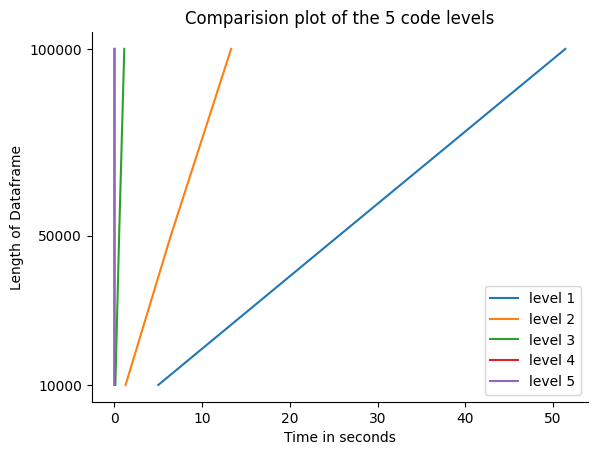

In [44]:
plot_columns = ['level 1', 'level 2', 'level 3', 'level 4', 'level 5']

for column_i in (plot_columns):
     plt.plot(
        numeric_results[column_i], 
        numeric_results['Dataframe length'], 
        label = column_i
        )
     
plt.xlabel('Time in seconds')
plt.ylabel('Length of Dataframe')

plt.yticks([10000, 50000, 100000])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Comparision plot of the 5 code levels')
plt.legend()
plt.show()

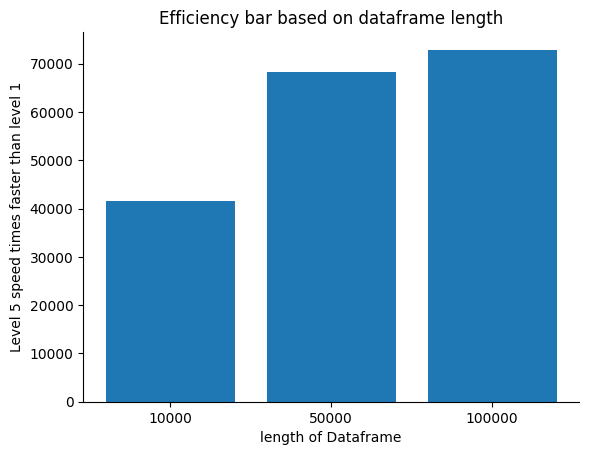

In [122]:
x = ['10000', '50000', '100000']
y = np.array(numeric_results['comparision'])

plt.bar(x, numeric_results['comparision'])

plt.title('Efficiency bar based on dataframe length')

plt.xlabel('length of Dataframe')
plt.ylabel('Level 5 speed times faster than level 1')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [69]:
import time

In [135]:
df = pd.DataFrame()

size = 100000

df['age'] = np.random.randint(0, 100, size)
df['time_on_socialmedia_per_day(hours)'] = np.random.uniform(0, 5, size)
df['number_of_workouts_per_week'] = np.random.randint(0, 10, size)
df['food_routine'] = np.random.choice(['healthy', 'balanced', 'moderate', 'irregular', 'unhealthy'], size)
df['avg_time_sleeping'] = np.random.uniform(0, 10, size)

In [136]:
start_time = time.time()

df['Need Doctor? (1)'] = None
for column in ['time_on_socialmedia_per_day(hours)', 'number_of_workouts_per_week', 'food_routine', 'avg_time_sleeping']:    
    for index in range(len(df)):
        age = df.loc[index, 'age']

        if (check_age(age) == True) and (recommend_doctor(column, df.loc[index, column]) == True):
            df.loc[index, 'Need Doctor? (1)'] = True
        
        else:

         if (df.loc[index, 'Need Doctor? (1)'] == True):
             None

         else: 
             df.loc[index, 'Need Doctor? (1)'] = False

end_time = time.time()

print(end_time - start_time)

54.22852158546448


In [137]:
conditions = [
    (
        df['age'] >= 40) & 
        (
            (df['time_on_socialmedia_per_day(hours)'] >= 4) |
            (df['number_of_workouts_per_week'] <= 1) |
            (df['food_routine'].isin(['irregular', 'unhealthy'])) |
            (df['avg_time_sleeping'] <= 4)
        )
    
]

In [138]:
choices = [
True,
]

In [139]:
%%timeit
df['Need Doctor? (5)'] = np.select(conditions, choices, default = False)

682 µs ± 6.57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [140]:
efficiency_curve_vector_level1 = [5.6606, 16.3902, 25.6203, 37.6420, 49.1088, 54.2, 63.5252, 77.4953]
efficiency_curve_vector_level5 = [0.00012, 0.000245, 0.000375, 0.000496, 0.000620, 0.000685, 0.000806, 0.000973]

efficiency = np.divide(efficiency_curve_vector_level1, efficiency_curve_vector_level5)

efficiency_curve_dataframe_length = [10000, 30000, 50000, 70000, 90000, 100000, 120000, 140000]

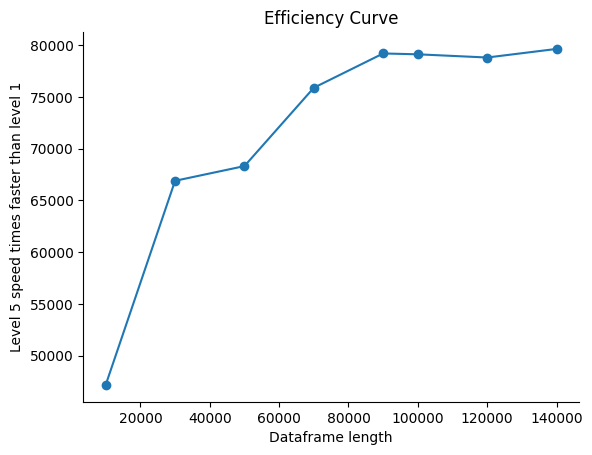

In [142]:
plt.plot(efficiency_curve_dataframe_length, efficiency)
plt.scatter(efficiency_curve_dataframe_length, efficiency)

plt.title('Efficiency Curve')

plt.xlabel('Dataframe length')
plt.ylabel('Level 5 speed times faster than level 1')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()